In [1]:
import random
import matplotlib.pyplot as plt

In [2]:
# Detailed Rank to MMR Mapping
RANK_MMR = {
    "Iron 4": 800, "Iron 3": 850, "Iron 2": 900, "Iron 1": 950,
    "Bronze 4": 1000, "Bronze 3": 1050, "Bronze 2": 1100, "Bronze 1": 1150,
    "Silver 4": 1200, "Silver 3": 1250, "Silver 2": 1300, "Silver 1": 1350,
    "Gold 4": 1400, "Gold 3": 1450, "Gold 2": 1500, "Gold 1": 1550,
    "Platinum 4": 1600, "Platinum 3": 1650, "Platinum 2": 1700, "Platinum 1": 1750,
    "Diamond 4": 1800, "Diamond 3": 1850, "Diamond 2": 1900, "Diamond 1": 1950
}

In [3]:
# Player Data
class Player:
    def __init__(self, rank, last_season_rank, win_rate):
        self.rank = rank  # Current Rank
        self.last_season_rank = last_season_rank  # Previous Rank
        self.win_rate = win_rate  # Self-reported win rate
        self.mmr = self.estimate_mmr()  # Estimated MMR
        self.lp = 50  # Default LP start
        self.tilt = 0  # Tilt Level
        self.streak = 0  # Win/Loss Streak Counter
        self.game_history = []  # Game results

    def estimate_mmr(self):
        """Estimate MMR based on current and last season rank."""
        base_mmr = RANK_MMR.get(self.rank, 1500)
        last_season_mmr = RANK_MMR.get(self.last_season_rank, 1500)
        mmr_adjustment = int((self.win_rate - 50) * 10)  # Adjust MMR based on win rate
        return (base_mmr + last_season_mmr) // 2 + mmr_adjustment

    def play_game(self):
        """Simulate a ranked game with matchmaking manipulation"""
        difficulty = self.mmr + (self.streak * 20)  # Streak-based difficulty adjustment
        opponent_skill = random.randint(self.mmr - 50, self.mmr + 50)
        
        # Win probability based on difficulty
        win_chance = max(10, min(90, 50 + (self.mmr - difficulty) / 2))
        won = random.randint(1, 100) <= win_chance
        
        # LP Gains/Losses (Based on previous rank and win rate)
        lp_gain = random.randint(15, 22) if won else random.randint(18, 28)
        lp_loss = random.randint(18, 25) if not won else random.randint(12, 18)
        
        if won:
            self.lp += lp_gain
            self.mmr += random.randint(5, 10)
            self.streak += 1
        else:
            self.lp -= lp_loss
            self.mmr -= random.randint(5, 10)
            self.streak -= 1
        
        # Track tilt
        if not won:
            self.tilt += (lp_loss - 15) + abs(self.streak * 2)
        else:
            self.tilt = max(0, self.tilt - 5)

        self.game_history.append(1 if won else 0)

    def simulate_games(self, num_games):
        """Simulate a series of ranked games"""
        for _ in range(num_games):
            self.play_game()

        return self.game_history

In [4]:
# Get User Input
print("\nPlease enter your rank and last season's rank in the format: 'Silver 4', 'Gold 3', etc.")
rank = input("Enter your current rank: ")
last_season_rank = input("Enter your last season's rank: ")

print("\nEnter your win rate as a percentage (e.g., 55 for 55%)")
win_rate = float(input("Enter your estimated win rate: "))

print("\nEnter the number of ranked games you want to simulate.")
num_games = int(input("Enter the number of games: "))


Please enter your rank and last season's rank in the format: 'Silver 4', 'Gold 3', etc.
Enter your current rank: Gold 3
Enter your last season's rank: Sliver 2

Enter your win rate as a percentage (e.g., 55 for 55%)
Enter your estimated win rate: 55

Enter the number of ranked games you want to simulate.
Enter the number of games: 100


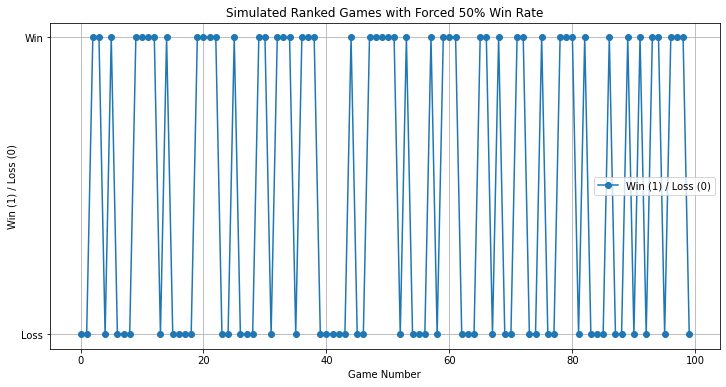


Simulation Complete:
Final LP: -86
Final Rank: Gold 3
Final MMR: 1507
Final Tilt Level: 182


In [5]:
# Create Player Instance
player = Player(rank, last_season_rank, win_rate)
history = player.simulate_games(num_games)

# Plot Results
plt.figure(figsize=(12, 6))
plt.plot(range(num_games), player.game_history, marker='o', linestyle='-', label='Win (1) / Loss (0)')
plt.title("Simulated Ranked Games with Forced 50% Win Rate")
plt.xlabel("Game Number")
plt.ylabel("Win (1) / Loss (0)")
plt.yticks([0, 1], ['Loss', 'Win'])
plt.grid()
plt.legend()
plt.show()

# Display Final Stats
print("\nSimulation Complete:")
print(f"Final LP: {player.lp}")
print(f"Final Rank: {player.rank}")
print(f"Final MMR: {player.mmr}")
print(f"Final Tilt Level: {player.tilt}")


# Tilt Level Explanation 
Tilt Level represents frustration caused by losing streaks and LP loss.
Higher tilt levels indicate emotional frustration, leading to bad decision-making.
General Tilt Levels:"

0-10: Calm - The player is mentally stable and playing normally.

10-30: Annoyed - Frustration is noticeable but still manageable.

30-60: Tilted - The player is likely making poor decisions due to frustration.

60+: Highly Tilted - Emotional play, rage queuing, and poor performance expected.

In [6]:
# Ask if the user wants to simulate 10 average runs
print("\nWould you like to simulate the average results of playing this same number of games 10 times?")
repeat_simulation = input("Enter 'yes' to run 10 simulations, or anything else to skip: ").lower()

if repeat_simulation == 'yes':
    avg_lp, avg_mmr, avg_tilt = 0, 0, 0
    for _ in range(10):
        player = Player(rank, last_season_rank, win_rate)
        player.simulate_games(num_games)
        avg_lp += player.lp
        avg_mmr += player.mmr
        avg_tilt += player.tilt
    
    print("\nAverage Results After 10 Simulations:")
    print(f"Average Final LP: {avg_lp // 10}")
    print(f"Average Final MMR: {avg_mmr // 10}")
    print(f"Average Final Tilt Level: {avg_tilt // 10}")



Would you like to simulate the average results of playing this same number of games 10 times?
Enter 'yes' to run 10 simulations, or anything else to skip: yes

Average Results After 10 Simulations:
Average Final LP: -84
Average Final MMR: 1534
Average Final Tilt Level: 199
